# Boston House Price Data EDA

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [70]:
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [71]:
boston_data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [72]:
df = pd.DataFrame(boston_data['data'],columns=boston_data['feature_names'])
df['MEDV'] = boston_data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### EDA & Data Visualizations¶


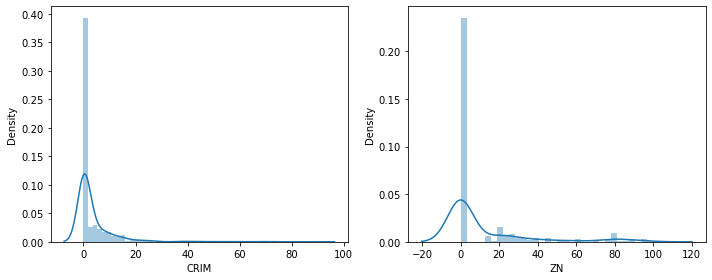

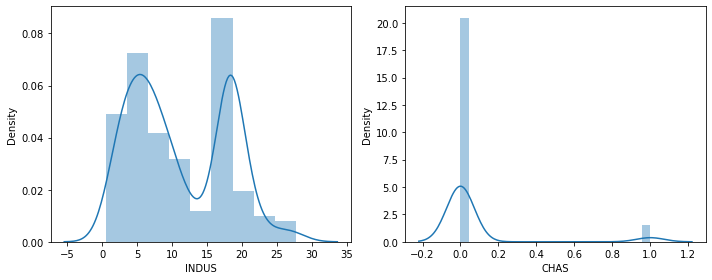

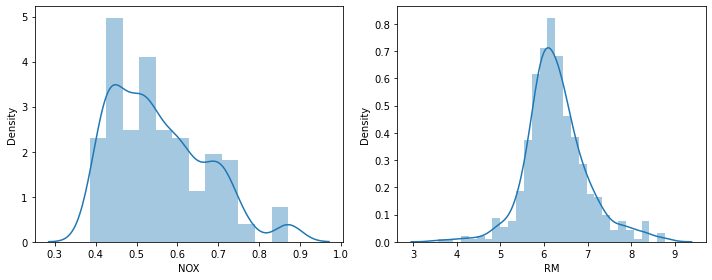

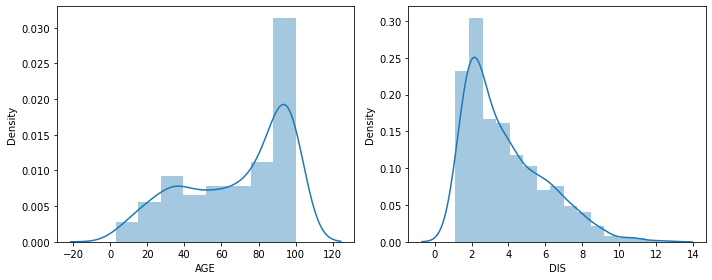

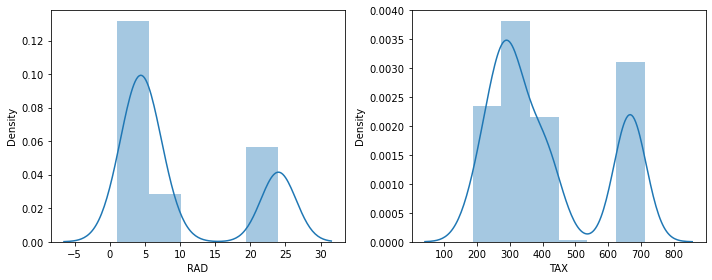

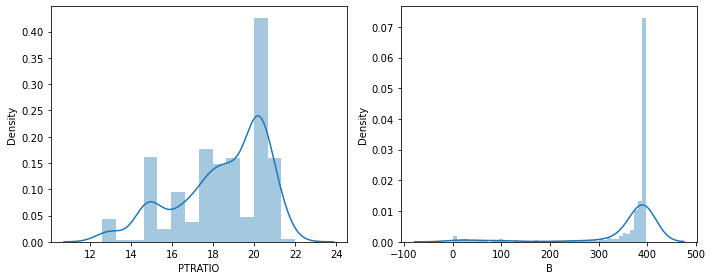

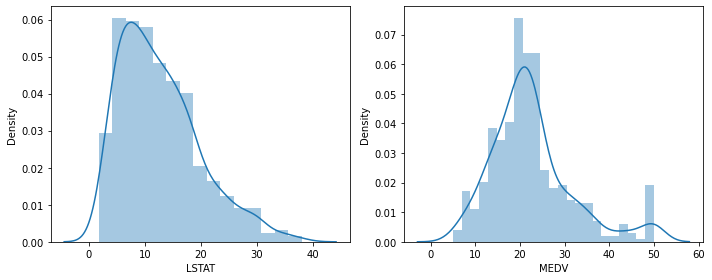

In [73]:
# Function to plot histogram

def plot_hist(dataframe):
    numeric_cols = dataframe.select_dtypes(include=np.number).columns.tolist()
    dataframe = dataframe[numeric_cols]

    for i in range(0,len(numeric_cols),2):
        if len(numeric_cols) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_cols[i]], kde=True)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_cols[i+1]], kde=True)
            plt.tight_layout()
            plt.show()
        else:
            sns.distplot(dataframe[numeric_cols[i]], kde=True)
            
plot_hist(df)

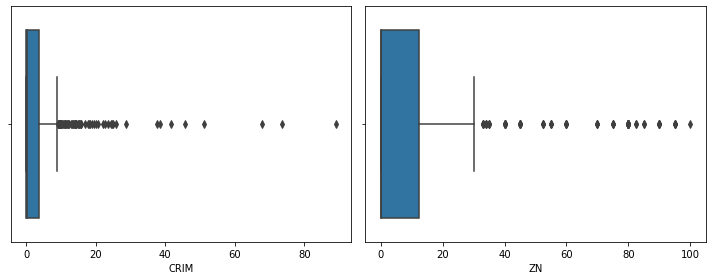

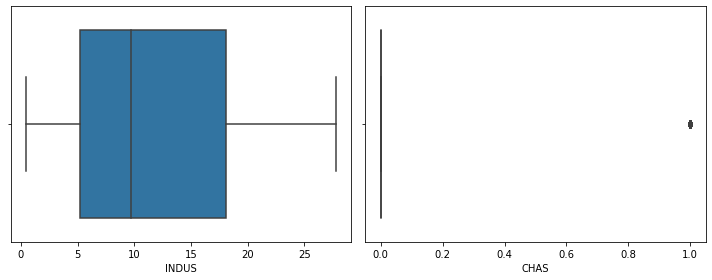

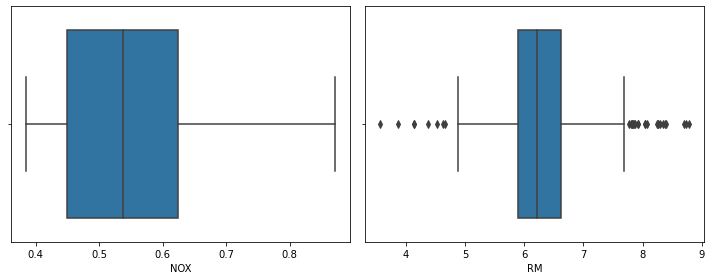

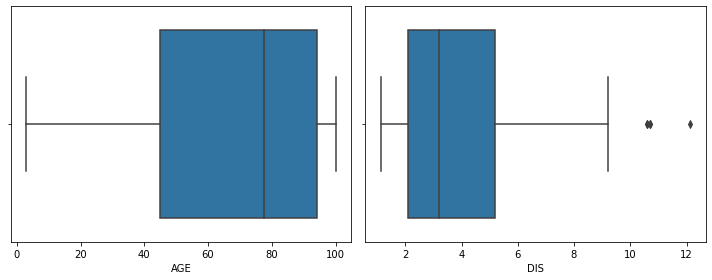

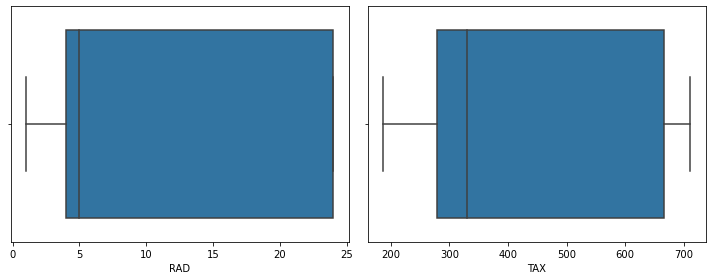

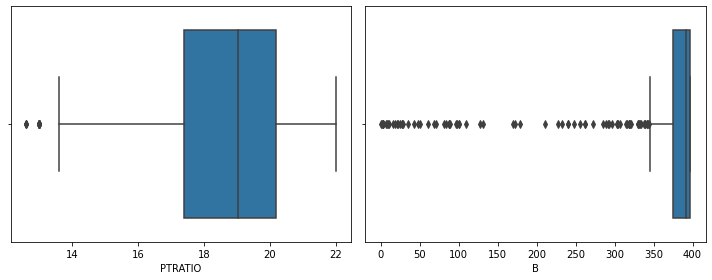

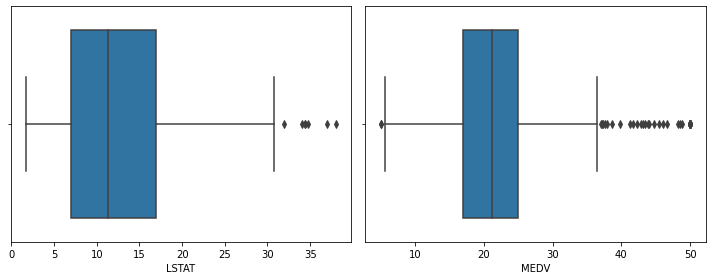

In [74]:
#function to plot box plots
def plot_box(dataframe):
    numeric_cols = dataframe.select_dtypes(include=np.number).columns.to_list()
    dataframe = dataframe[numeric_cols]
    
    for i in range(0,len(numeric_cols),2):
        if len(numeric_cols) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_cols[i]])
            plt.subplot(122)
            sns.boxplot(dataframe[numeric_cols[i+1]])
            plt.tight_layout()
            plt.show()
        else:
            sns.boxplot(dataframe[numeric_cols[i]])
            
plot_box(df)

Observations:
- The columns CRIM,ZN,B and MEDV are heavily skewed. This is due to the presence of the Outliers present in our dataset. We will deal with outliers in the upcoming steps.
- We can see that the values in the column CHAS are almost 0. This means that Charles River dummy variables are all 0, which in turn means that tract does not bound rivers.
- Since the features CHAS consist majorly only of a single value, it's variance is quite less and hence we can drop it since technically will be of no help in prediction.

In [75]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [76]:
for i in df.columns:
    if df[df[i]==0].shape[0] > 0:
        print(i,df[df[i]==0].shape[0])

ZN 372
CHAS 471


In [77]:
df['ZN'].replace(0,np.nan,inplace=True)
df['CHAS'].replace(0,np.nan,inplace=True)

In [78]:
print(df.isna().sum()) #NAN count

CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64


In [79]:
#df.isnull().sum()/len(df) * 100
print(df.isna().mean() * 100) #NAN percent

CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
MEDV        0.000000
dtype: float64


In [80]:
#As ZN and CHAS both have high percentage of null values we drop them
df.drop(columns=['ZN','CHAS'],inplace=True)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   NOX      506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      506 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


Treating outliers in the continuous columns
- Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
- To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
- To reduce left skewness, we take squares or cubes or higher powers.
- But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
- Hence for this data we use a method called Winsorization. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots. Do read up on it more here

Lets' write a function below that treats all the outliers in the numeric features using winsorization.

-22.19111175868521 29.418158873309714
8


<AxesSubplot:xlabel='CRIM'>

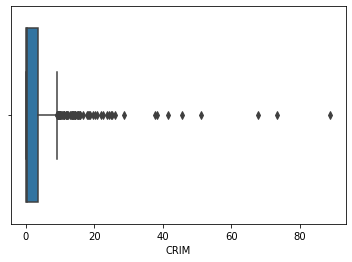

In [82]:
#CRIM

low_fence = df['CRIM'].mean() - 3*df['CRIM'].std()
high_fence = df['CRIM'].mean() + 3*df['CRIM'].std()
print(low_fence,high_fence)
outlier = df[(df['CRIM'] < low_fence) | (df['CRIM'] > high_fence)].shape[0]
print(outlier)
sns.boxplot(df['CRIM'])

<AxesSubplot:xlabel='CRIM'>

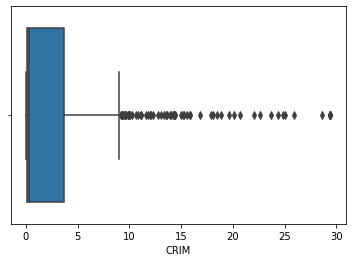

In [83]:
df['CRIM'] = np.where(df['CRIM']>high_fence,high_fence,df['CRIM'])
df['CRIM'] = np.where(df['CRIM']<low_fence,low_fence,df['CRIM'])
                    
sns.boxplot(df['CRIM'])

82.7894384680792 630.5586247730259
25


<AxesSubplot:xlabel='B'>

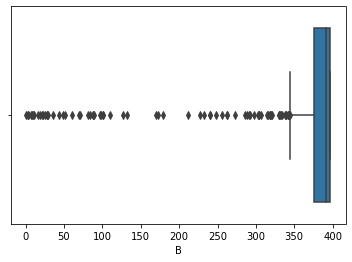

In [84]:
#B

low_fence = df['B'].mean() - 3*df['B'].std()
high_fence = df['B'].mean() + 3*df['B'].std()
print(low_fence,high_fence)
outlier = df[(df['B'] < low_fence) | (df['B'] > high_fence)].shape[0]
print(outlier)
sns.boxplot(df['B'])

<AxesSubplot:xlabel='B'>

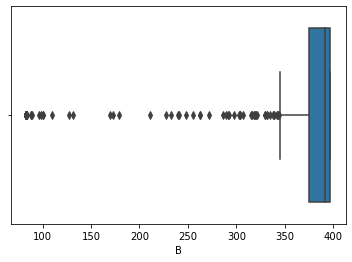

In [85]:
df['B'] = np.where(df['B']>high_fence,high_fence,df['B'])
df['B'] = np.where(df['B']<low_fence,low_fence,df['B'])
                    
sns.boxplot(df['B'])

#### Storing cleaned data

In [87]:
df.to_csv('Boston_Cleaned_Data.csv',index=False)